In [2]:
%matplotlib inline
import os
import sys
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import climatools.plot.plot

from IPython import display

import imp
del xr.DataArray.climaviz
imp.reload(climatools.plot.plot)

<module 'climatools.plot.plot' from '/nuwa_cluster/home/jackyu/climatools/climatools/plot/plot.py'>

In [46]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu', 
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'tmp')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')



In [47]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu', 
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'tmp')


# the set calculated using `absmean`
path_xfluxg = os.path.join(dir_run, 'output_xfluxg.dat')
path_xcoolrg = os.path.join(dir_run, 'output_xcoolrg.dat')
path_xflux = os.path.join(dir_run, 'output_xflux.dat')
path_xcoolr = os.path.join(dir_run, 'output_xcoolr.dat')

In [48]:
# load CRD's fluxes and cooling rates

# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_fluxg = ds

# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_coolrg = ds

# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [49]:
# load CRD's fluxes and cooling rates
# the set calculated using `absmean`

# load xfluxg
df = pd.read_csv(path_xfluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_xfluxg = ds

# load xcoolrg
df = pd.read_csv(path_xcoolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_xcoolrg = ds

# load xflux
df = pd.read_csv(path_xflux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_xflux = ds.set_coords(['level'])

# load xcoolr
df = pd.read_csv(path_xcoolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_xcoolr = ds.set_coords(['layer'])

In [50]:
# load mean absorption coefficient and k-distribution functions
# calculated by CRD

# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [72]:
###
names_var = ['flug', 'fnetg', 'coolrg']
colors = ['darkred', 'lightcoral', 'blue']
dict_color = dict(zip(names_var, colors))

###
names_model = ['crd', 'clirad', 'crdx']
linestyles = ['-', '--', '-.']
dict_linestyle = dict(zip(names_model, linestyles))

### 
yscales = ['linear', 'log']
varlims_from_indexrange = [(50, 1050), (1e-4, 50)]
dict_varlim = dict(zip(yscales, varlims_from_indexrange))

###
vartypes = ['flux', 'cooling rate']
names_allowedvar = [['flug', 'fnetg'], ['coolrg']]
dims_vertical = ['level', 'layer']
iverticals = [[0, 1, 2, 75], [0, 1, 2, 74]]
dict_names_allowedvar = dict(zip(vartypes, names_allowedvar))
dict_dims_vertical = dict(zip(vartypes, dims_vertical))
dict_iverticals = dict(zip(vartypes, iverticals))


### 
sum_over_gs = [False, True]


### what data have we?
vartypes = ['flux', 'cooling rate']
names_model = ['crd', 'crdx']
dss_flux = [ds_fluxg, ds_xfluxg]
dss_cool = [ds_coolrg, ds_xcoolrg]
names_ds = list(itertools.product(vartypes, names_model))
dss = list(ds 
           for ds in itertools.chain(dss_flux, dss_cool)
           if ds)
dict_ds = dict(zip(names_ds, dss))


### what to plot in each axis
names_ax = list(itertools.product(vartypes, yscales))




-----  g-group 1  ---------------


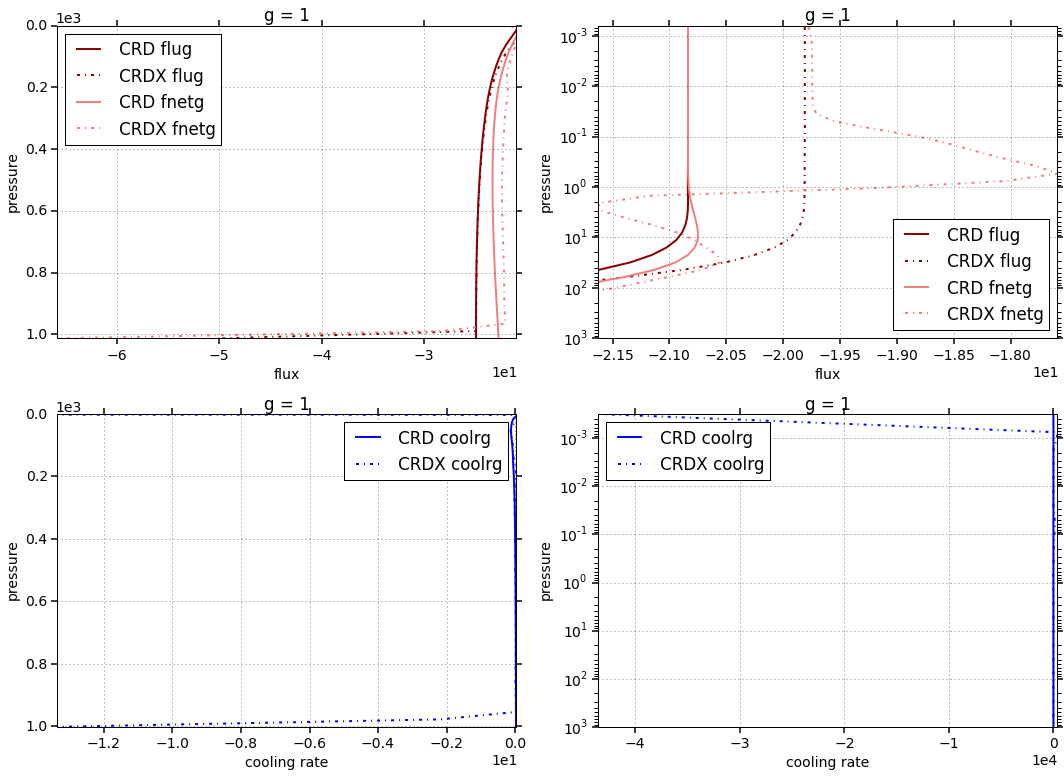


-----  g-group 2  ---------------


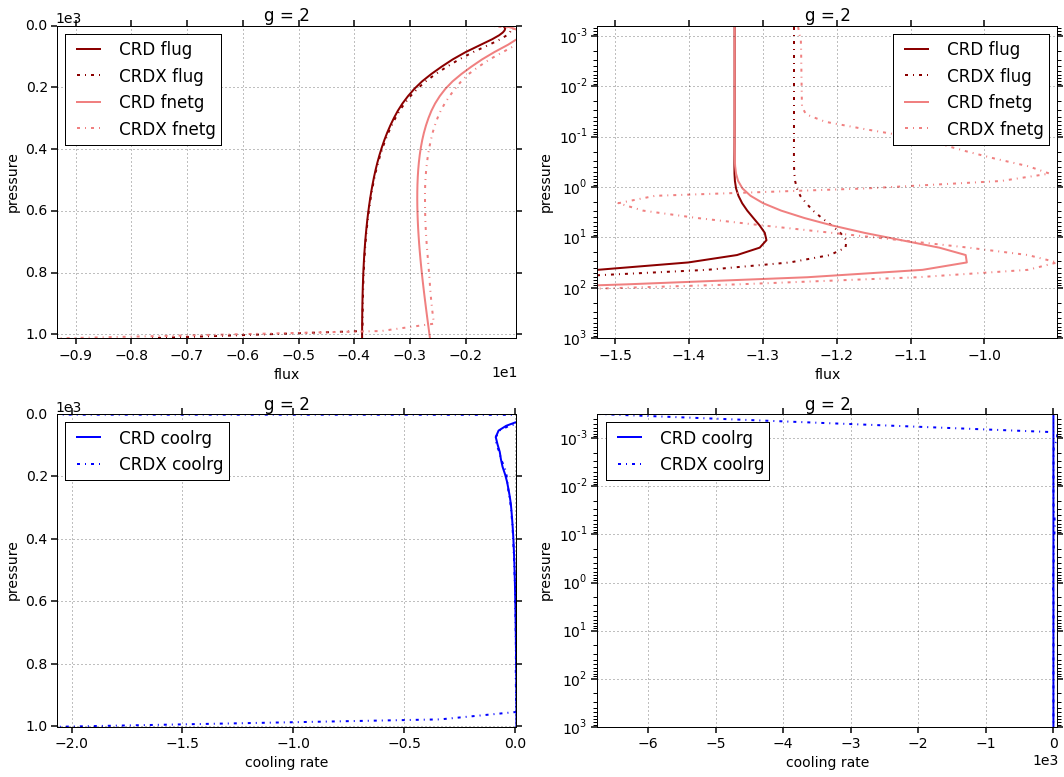


-----  g-group 3  ---------------


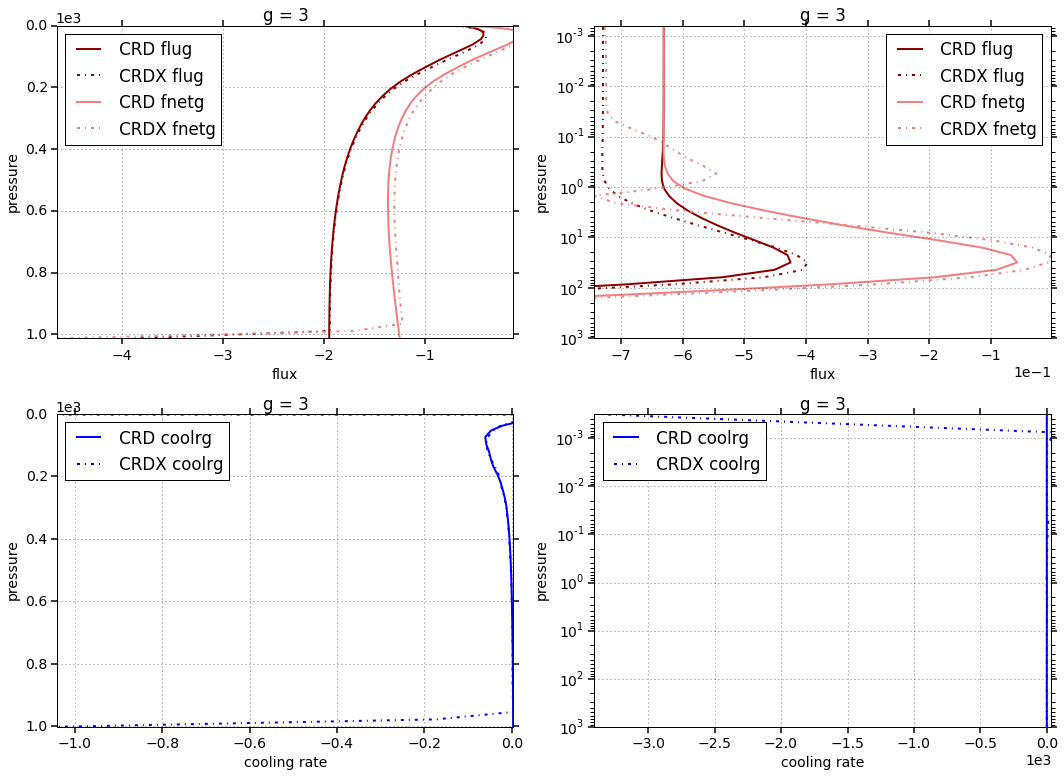


-----  g-group 4  ---------------


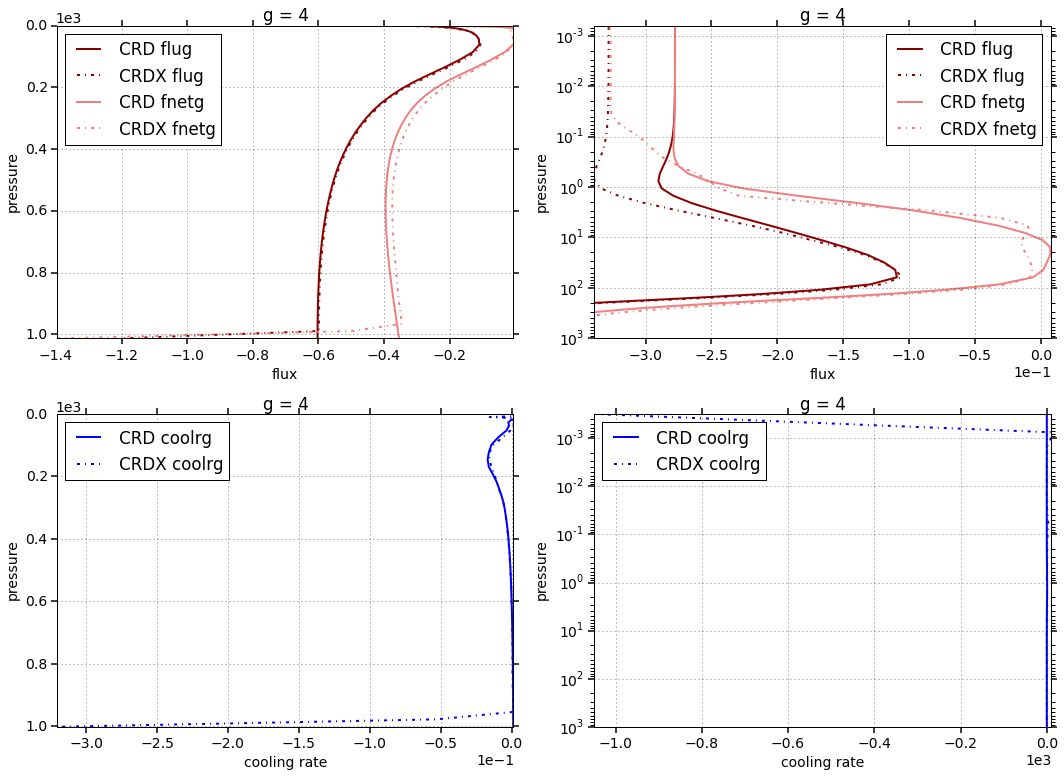

In [52]:
matplotlib.rcParams.update({'font.size': 14})

for g in [1, 2, 3, 4]:
    
    print()
    print(5 * '-' + '  g-group {}  '.format(g) + 15 * '-')
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
    axs = axs.flatten()

    for ax, (vartype, yscale) in zip(axs, names_ax):
        for name_var in dict_names_allowedvar[vartype]:
            for model in names_model:
                #print(ax, vartype, yscale, name_var, model)
                ds = dict_ds[(vartype, model)]
                ds[name_var].sel(g=g)\
                .climaviz\
                .plot(ax=ax, 
                      linewidth=2, grid=True,
                      label=model.upper() + ' ' + name_var,
                      color=dict_color[name_var],
                      linestyle=dict_linestyle[model],
                      index_on_yaxis=True, 
                      yincrease=False, yscale=yscale,
                      varlim_from_indexrange=dict_varlim[yscale])
            
                ax.set_xlabel(vartype)
                
                ax.yaxis.set_tick_params(which='major',
                                         direction='out',
                                         size=6, width=1.5)
                ax.yaxis.set_tick_params(which='minor',
                                         direction='out',
                                         size=4, width=1.)
                
                ax.xaxis.set_tick_params(which='major',
                                         direction='out',
                                         size=6, width=1.5)
                ax.xaxis.set_tick_params(which='minor',
                                         direction='out',
                                         size=4, width=1.)
            
    plt.tight_layout()
    display.display(plt.gcf())
    plt.close()

In [78]:
def summarytable(vartype='flux', model='crd', sum_over_g=False,
                 ivertical=None):
    if ivertical == None:
        ds = dict_ds[(vartype, model)]
    else:
        ds = dict_ds[(vartype, model)].isel(pressure=ivertical)
    
    if sum_over_g:
        ds = ds.sum('g')
    
    df = ds.to_dataframe()
    df = df.set_index([dict_dims_vertical[vartype]], append=True)
    return df


def print_diff_benchmark(dict_df, 
                         benchmark='crd', 
                         title='Untitled'):
        
    print(title)
    
    othercases = [case for case in dict_df.keys()]
    othercases.remove(benchmark)   

    print(benchmark.upper())
    display.display(dict_df[benchmark])
    
    for case in othercases:
        print(case.upper())
        display.display(dict_df[case])

    for case in othercases:
        print('{} - {}'.format(case.upper(), benchmark.upper()))
        display.display(dict_df[case] - dict_df[benchmark])

In [81]:
for sum_over_g in sum_over_gs:
    print(2*'\n')
    for vartype in vartypes:
        print(2*'\n')
        dict_tables = {model: summarytable(vartype=vartype,
                                          model=model,
                                          sum_over_g=sum_over_g,
                                          ivertical=dict_iverticals[vartype])
                       for model in names_model}
        print_diff_benchmark(dict_tables, 
                             benchmark='crd',
                             title='{}. {}'\
                             .format(vartype.upper(),
                                     'total over g' if sum_over_g
                                     else 'separate gs'))







FLUX. separate gs
CRD


flug          fldg      fnetg
g pressure    level                                    
1 0.000000    1     -20.836884  0.000000e+00 -20.836884
  0.000624    2     -20.836884  3.652674e-08 -20.836884
  0.000876    3     -20.836884  5.325815e-08 -20.836884
  1013.000000 76    -24.940622  2.216023e+00 -22.724599
2 0.000000    1      -1.338238  0.000000e+00  -1.338238
  0.000624    2      -1.338238  4.670471e-08  -1.338238
  0.000876    3      -1.338238  6.808690e-08  -1.338238
  1013.000000 76     -3.860213  1.218332e+00  -2.641881
3 0.000000    1      -0.631027  0.000000e+00  -0.631027
  0.000624    2      -0.631028  3.436076e-07  -0.631027
  0.000876    3      -0.631028  5.005504e-07  -0.631028
  1013.000000 76     -1.950365  6.969239e-01  -1.253441
4 0.000000    1      -0.277582  0.000000e+00  -0.277582
  0.000624    2      -0.277585  9.943653e-07  -0.277584
  0.000876    3      -0.277586  1.448109e-06  -0.277584
  1013.000000 76     -0.603036  2.490466e-01  -0.353989

CRDX


flug       fldg      fnetg
g pressure    level                                 
1 0.000000    1     -16.549747   0.000000 -16.549747
  0.000624    2     -19.809536   0.034459 -19.775077
  0.000876    3     -19.809536   0.044839 -19.764697
  1013.000000 76    -49.886453 -16.003562 -65.890015
2 0.000000    1      -0.753313   0.000000  -0.753313
  0.000624    2      -1.257827   0.005333  -1.252493
  0.000876    3      -1.257827   0.006940  -1.250887
  1013.000000 76     -7.720869  -1.619111  -9.339980
3 0.000000    1      -0.474981   0.000000  -0.474981
  0.000624    2      -0.729806   0.002694  -0.727112
  0.000876    3      -0.729807   0.003506  -0.726301
  1013.000000 76     -3.899731  -0.744292  -4.644023
4 0.000000    1      -0.249497   0.000000  -0.249497
  0.000624    2      -0.328006   0.000831  -0.327175
  0.000876    3      -0.328008   0.001081  -0.326926
  1013.000000 76     -1.201417  -0.197276  -1.398693

CRDX - CRD


flug       fldg      fnetg
g pressure    level                                 
1 0.000000    1       4.287137   0.000000   4.287137
  0.000624    2       1.027348   0.034458   1.061807
  0.000876    3       1.027348   0.044839   1.072187
  1013.000000 76    -24.945831 -18.219585 -43.165416
2 0.000000    1       0.584925   0.000000   0.584925
  0.000624    2       0.080412   0.005333   0.085745
  0.000876    3       0.080412   0.006940   0.087351
  1013.000000 76     -3.860656  -2.837443  -6.698099
3 0.000000    1       0.156046   0.000000   0.156046
  0.000624    2      -0.098778   0.002694  -0.096085
  0.000876    3      -0.098778   0.003505  -0.095273
  1013.000000 76     -1.949366  -1.441216  -3.390582
4 0.000000    1       0.028084   0.000000   0.028084
  0.000624    2      -0.050422   0.000830  -0.049592
  0.000876    3      -0.050422   0.001080  -0.049342
  1013.000000 76     -0.598382  -0.446322  -1.044704




COOLING RATE. separate gs
CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.001358
  0.000750    2      0.001132
  0.001052    3     -0.001838
  1001.112500 75     0.015553
2 0.000312    1     -0.000947
  0.000750    2     -0.001049
  0.001052    3     -0.001259
  1001.112500 75     0.006305
3 0.000312    1     -0.009269
  0.000750    2     -0.011104
  0.001052    3     -0.012419
  1001.112500 75     0.003296
4 0.000312    1     -0.027064
  0.000750    2     -0.029834
  0.001052    3     -0.034830
  1001.112500 75     0.001204

CRDX


coolrg
g pressure    layer              
1 0.000312    1     -43606.392000
  0.000750    2        348.418200
  0.001052    3        360.521550
  1001.112500 75       -13.370839
2 0.000312    1      -6748.910900
  0.000750    2         53.924213
  0.001052    3         55.797517
  1001.112500 75        -2.066746
3 0.000312    1      -3408.810400
  0.000750    2         27.230582
  0.001052    3         28.175602
  1001.112500 75        -1.041937
4 0.000312    1      -1050.203300
  0.000750    2          8.358997
  0.001052    3          8.644043
  1001.112500 75        -0.320946

CRDX - CRD


coolrg
g pressure    layer              
1 0.000312    1     -43606.390642
  0.000750    2        348.417068
  0.001052    3        360.523388
  1001.112500 75       -13.386392
2 0.000312    1      -6748.909953
  0.000750    2         53.925262
  0.001052    3         55.798776
  1001.112500 75        -2.073051
3 0.000312    1      -3408.801131
  0.000750    2         27.241686
  0.001052    3         28.188021
  1001.112500 75        -1.045232
4 0.000312    1      -1050.176236
  0.000750    2          8.388831
  0.001052    3          8.678873
  1001.112500 75        -0.322150







FLUX. total over g
CRD


,,flug,fldg,fnetg
pressure,level,,,
0.000000,1,-23.083730,0.000000,-23.083730
0.000624,2,-23.083735,0.000001,-23.083733
0.000876,3,-23.083736,0.000002,-23.083734
1013.000000,76,-31.354235,4.380325,-26.973910


CRDX


,,flug,fldg,fnetg
pressure,level,,,
0.000000,1,-18.027538,0.000000,-18.027538
0.000624,2,-22.125175,0.043317,-22.081858
0.000876,3,-22.125177,0.056365,-22.068811
1013.000000,76,-62.708470,-18.564241,-81.272711


CRDX - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.000000,1,5.056192,0.000000,5.056192
0.000624,2,0.958559,0.043315,1.001875
0.000876,3,0.958560,0.056363,1.014923
1013.000000,76,-31.354235,-22.944566,-54.298801





COOLING RATE. total over g
CRD


,,coolrg
pressure,layer,
0.000312,1,-0.038637
0.000750,2,-0.040855
0.001052,3,-0.050346
1001.112500,75,0.026357


CRDX


,,coolrg
pressure,layer,
0.000312,1,-54814.316600
0.000750,2,437.931992
0.001052,3,453.138712
1001.112500,75,-16.800467


CRDX - CRD


,,coolrg
pressure,layer,
0.000312,1,-54814.277963
0.000750,2,437.972848
0.001052,3,453.189058
1001.112500,75,-16.826825


In [83]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')